## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense, Embedding, Input, Flatten, Concatenate, Dot
from tensorflow.keras.models import Model
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

## Dataset

In [2]:
anime_df = pd.read_csv('/content/drive/MyDrive/anime-recommender/dataset/anime.csv')
rating_df = pd.read_csv('/content/drive/MyDrive/anime-recommender/dataset/rating.csv')
rating_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


## Ratings vs Counts

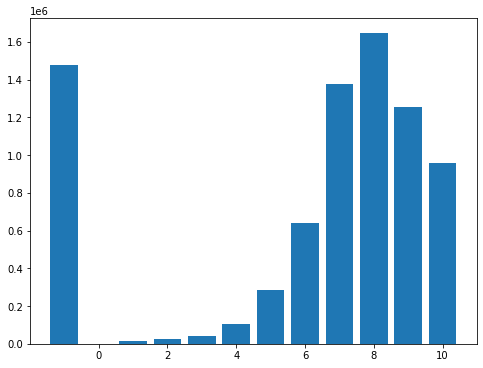

In [3]:
plt.figure(figsize=(8,6))
plt.bar(height=rating_df['rating'].value_counts(),x=list(rating_df['rating'].value_counts().index))
plt.show()

## Removing Columns with no ratings

In [4]:
# removing unwanted columns
rating_df = rating_df[rating_df['rating'] != -1]
rating_df.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


## Ratings vs Count after encoding

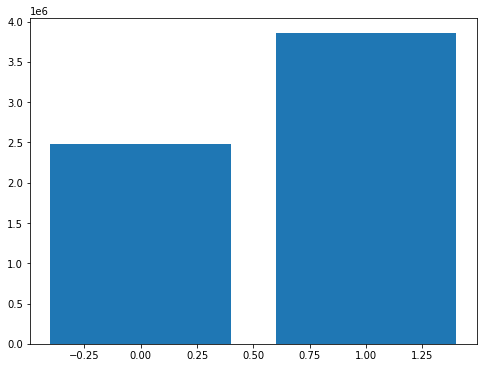

In [5]:
threshold = 8.0
to_rep = [i for i in range(1,11)]
val_rep = []
for i in to_rep:
    if i < threshold:
        val_rep.append(0)
    else:
        val_rep.append(1)
rating_df.replace(to_replace=to_rep,value=val_rep,inplace=True)
plt.figure(figsize=(8,6))
plt.bar(height=rating_df['rating'].value_counts(),x=list(rating_df['rating'].value_counts().index))
plt.show()

## Dependent vs Independent

In [6]:
rating_df = rating_df.sample(frac=1)
x_1 = np.array(rating_df['user_id']).reshape(-1,1)
x_2 = np.array(rating_df['anime_id']).reshape(-1,1)
y = np.array(rating_df['rating'])
print(x_1.shape,x_2.shape,y.shape)

(6337241, 1) (6337241, 1) (6337241,)


## Tensorflow Model

In [7]:
# model architecture
u = Input(shape=(1))
a = Input(shape=(1))
user_emb = Embedding(rating_df['user_id'].max()+1,10)(u)
anime_emb = Embedding(rating_df['anime_id'].max()+1,10)(a)
fl_1 = Flatten()(user_emb)
fl_2 = Flatten()(anime_emb)
dot = Concatenate()((fl_1,fl_2))
fl_3 = Flatten()(dot)
fc_1 = Dense(5,activation='relu')(fl_3)
fc_2 = Dense(4,activation='relu')(fc_1)
out = Dense(1,activation='sigmoid')(fc_2)
model = Model(inputs=[u,a],outputs=[out])

# model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 10)        735170      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 10)        344760      input_2[0][0]                    
______________________________________________________________________________________________

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
train = model.fit(x=(x_1,x_2),y=y,epochs=10,batch_size=1024)

Epoch 1/10
6189/6189 [==============================] - 43s 6ms/step - loss: 0.5084 - accuracy: 0.7469
Epoch 2/10
6189/6189 [==============================] - 40s 6ms/step - loss: 0.4806 - accuracy: 0.7633
Epoch 3/10
6189/6189 [==============================] - 39s 6ms/step - loss: 0.4735 - accuracy: 0.7675
Epoch 4/10
6189/6189 [==============================] - 39s 6ms/step - loss: 0.4686 - accuracy: 0.7704
Epoch 5/10
6189/6189 [==============================] - 39s 6ms/step - loss: 0.4649 - accuracy: 0.7727
Epoch 6/10
6189/6189 [==============================] - 39s 6ms/step - loss: 0.4616 - accuracy: 0.7748
Epoch 7/10
6189/6189 [==============================] - 39s 6ms/step - loss: 0.4589 - accuracy: 0.7765
Epoch 8/10
6189/6189 [==============================] - 39s 6ms/step - loss: 0.4566 - accuracy: 0.7779
Epoch 9/10
6189/6189 [==============================] - 39s 6ms/step - loss: 0.4546 - accuracy: 0.7790
Epoch 10/10
6189/6189 [==============================] - 39s 6ms/step - l

## Model Analysis

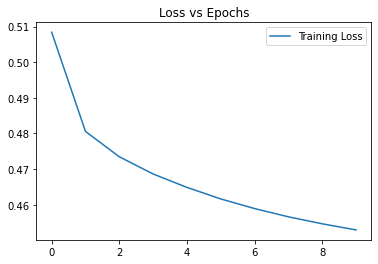

In [9]:
# loss over time
plt.title('Loss vs Epochs')
plt.plot(train.history['loss'],label='Training Loss')
plt.legend()
plt.show()

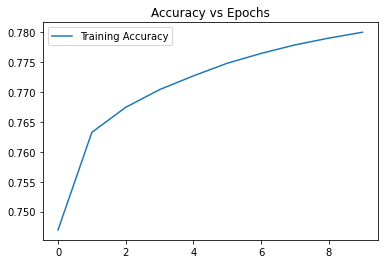

In [10]:
# accuracy over time
plt.title('Accuracy vs Epochs')
plt.plot(train.history['accuracy'],label='Training Accuracy')
plt.legend()
plt.show()

In [11]:
# confusion matrix
y_pred = model.predict((x_1,x_2)).round()

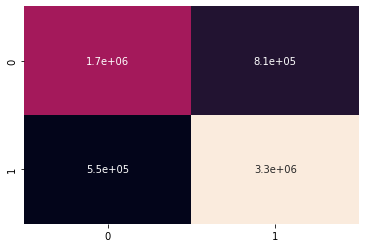

              precision    recall  f1-score   support

           0       0.75      0.68      0.71   2481411
           1       0.80      0.86      0.83   3855830

    accuracy                           0.79   6337241
   macro avg       0.78      0.77      0.77   6337241
weighted avg       0.78      0.79      0.78   6337241



In [12]:
# confusion matrix
sns.heatmap(confusion_matrix(y,y_pred),cbar=False,annot=True)
plt.show()

# classification report
print(classification_report(y,y_pred))

## Making Predictions

In [15]:
# model prediction for user 51606 with anime 1943
model.predict(x=(np.array(51606).reshape(-1,1),np.array(1943).reshape(-1,1))).round()

array([[0.]], dtype=float32)